YELP total number of reviews: 559922
YELP number of positive reviews: 279978
YELP number of negative reviews: 279944
YELP average number of tokens is 65.04


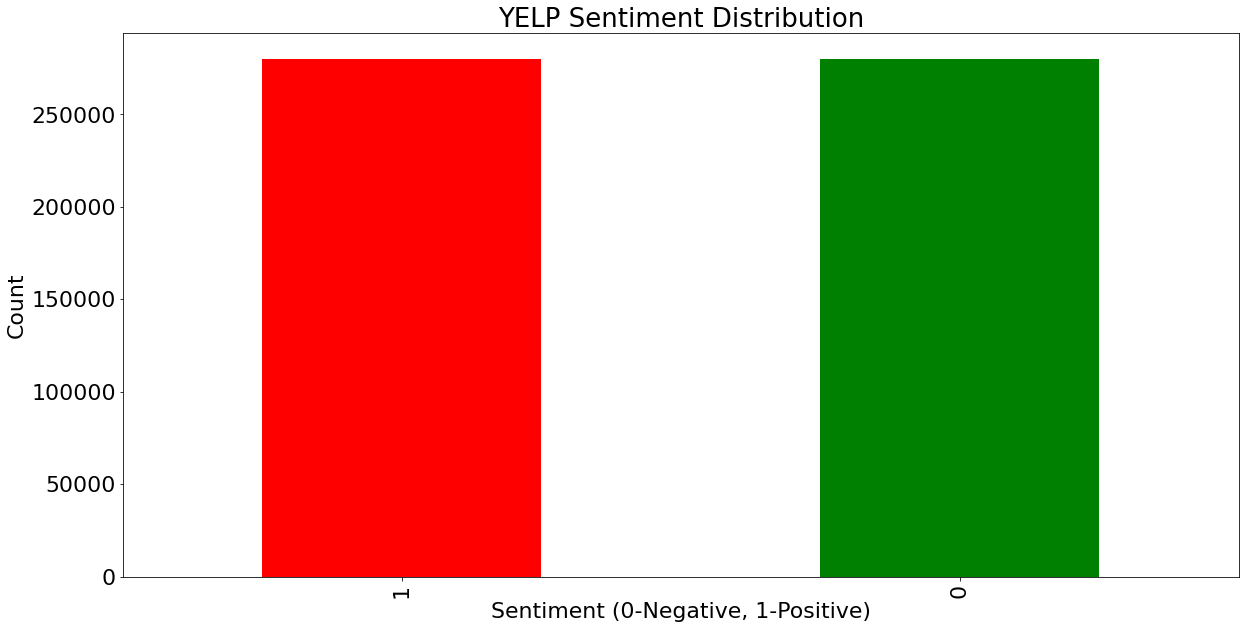

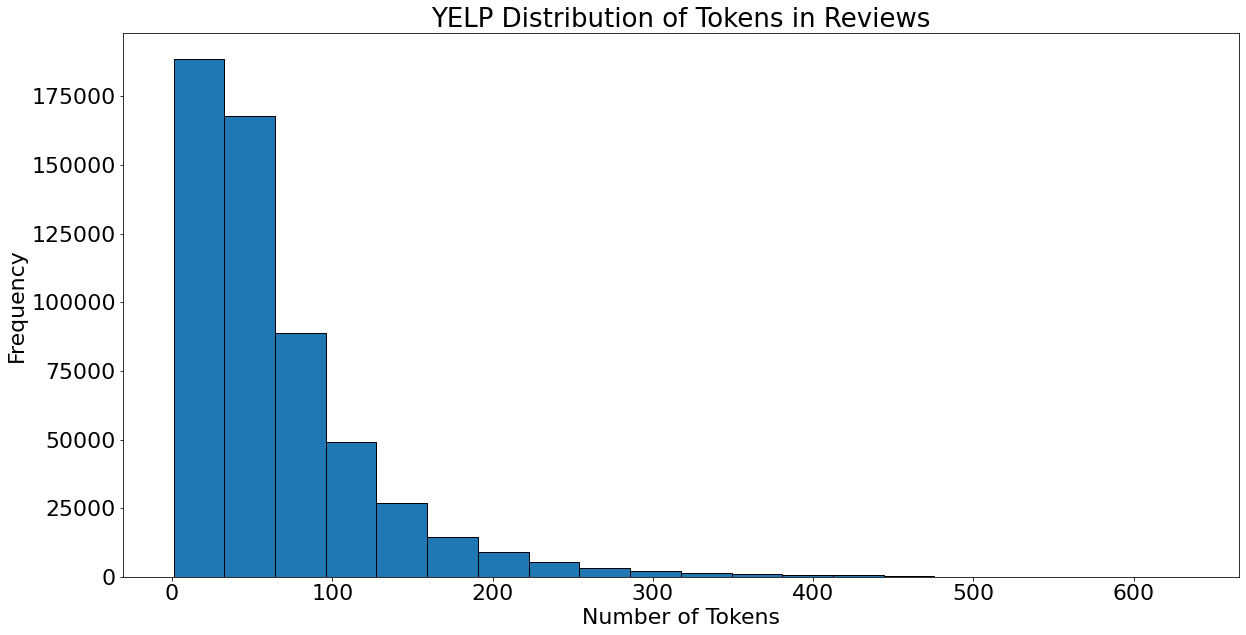

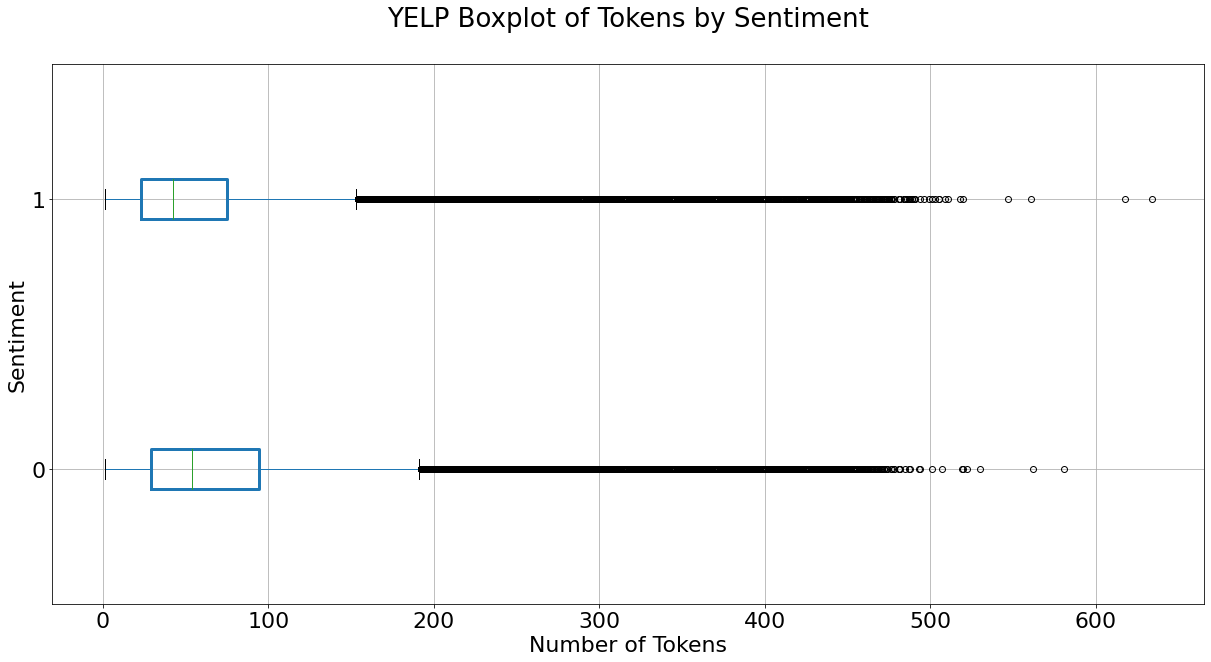

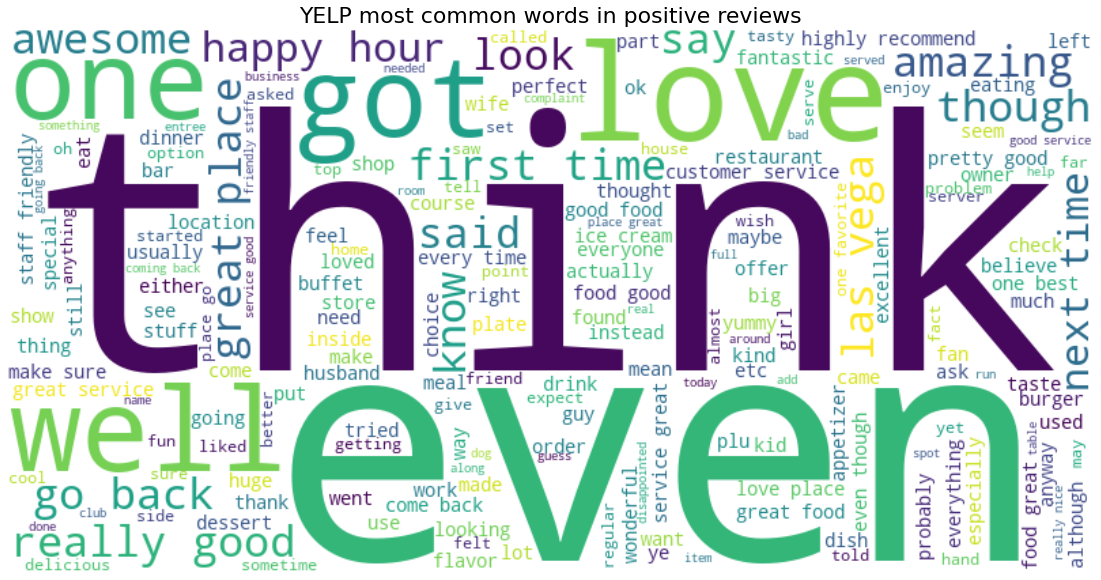

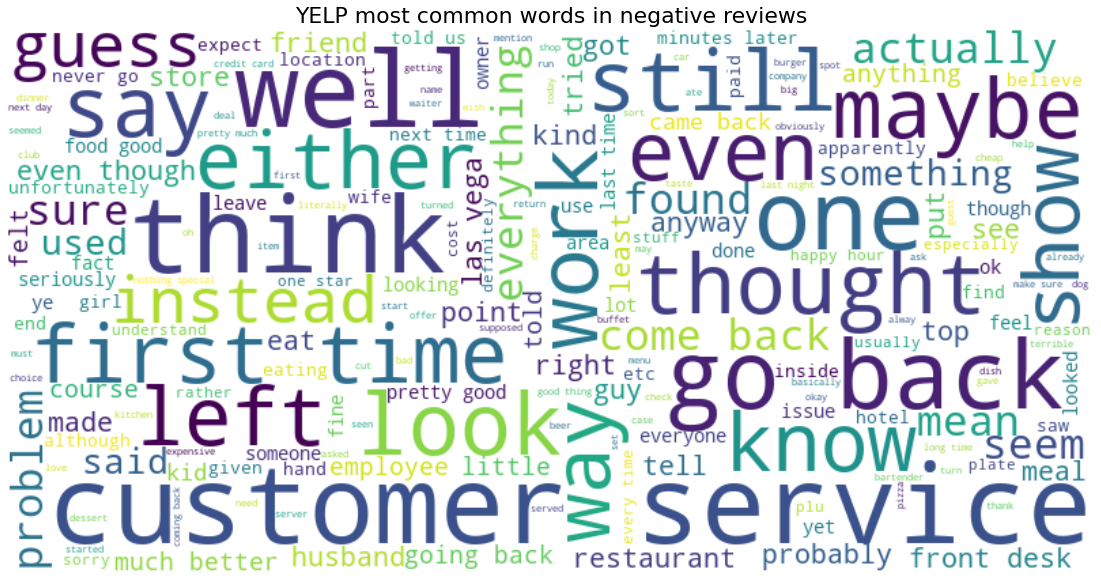

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def analyze_csv(file_path, dataset_name):
    fontsize=22
    
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the DataFrame has the required columns
    if 'review' not in df.columns or 'sentiment' not in df.columns:
        print("The CSV file must contain 'review' and 'sentiment' columns.")
        return
    
    # Drop NaN 
    df = df.dropna()

    # Basic statistics
    print(f"{dataset_name} total number of reviews: {len(df)}")
    print(f"{dataset_name} number of positive reviews: {sum(df['sentiment'])}")
    print(f"{dataset_name} number of negative reviews: {len(df) - sum(df['sentiment'])}")
    
    # Token Analysis
    df['tokens'] = df['review'].apply(lambda x: len(str(x).split()))
    
    # Average Tokens
    avg_tokens = df['tokens'].mean()
    print(f"{dataset_name} average number of tokens is {avg_tokens:.2f}")

    # Plot Sentiment Distribution
    plt.figure(figsize=(20, 10))
    df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
    plt.title(f"{dataset_name} Sentiment Distribution", fontsize=fontsize+4)
    plt.xlabel('Sentiment (0-Negative, 1-Positive)', fontsize=fontsize)
    plt.ylabel('Count', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)  # For x-axis tick labels
    plt.yticks(fontsize=fontsize)  # For y-axis tick labels
    plt.show()

    # Plot Token Histogram
    plt.figure(figsize=(20, 10))
    plt.hist(df['tokens'], bins=20, edgecolor='black')
    plt.title(f"{dataset_name} Distribution of Tokens in Reviews", fontsize=fontsize+4)
    plt.xlabel('Number of Tokens', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)  # For x-axis tick labels
    plt.yticks(fontsize=fontsize)  # For y-axis tick labels
    plt.show()

    # Boxplot of tokens by sentiment
    fig, ax = plt.subplots(figsize=(20, 10))  # adjust these values as needed
    bp = df.boxplot(column='tokens', by='sentiment', vert=False, ax=ax, return_type='dict')

    # Change the line width for boxes
    for box in bp['tokens']['boxes']:
        box.set(linewidth=3)  # Adjust the value for desired thickness

    ax.set_title('')  # removes the default title set by pandas
    plt.suptitle(f"{dataset_name} Boxplot of Tokens by Sentiment", fontsize=fontsize+4)
    plt.xlabel('Number of Tokens', fontsize=fontsize)
    plt.ylabel('Sentiment', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)  # For x-axis tick labels
    plt.yticks(fontsize=fontsize)  # For y-axis tick labels
    plt.show()


    # Create Word Cloud
    def plot_wordcloud(text, title):
        plt.figure(figsize=(20, 10))  # Adjust size as needed
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=fontsize)
        plt.show()

    positive_text = ' '.join(df[df['sentiment'] == 1]['review'].tolist())
    negative_text = ' '.join(df[df['sentiment'] == 0]['review'].tolist())

    plot_wordcloud(positive_text, f"{dataset_name} most common words in positive reviews")
    plot_wordcloud(negative_text, f"{dataset_name} most common words in negative reviews")



    return df

# Call the function with the YELP CSV file
file_path = "yelp_polarity_train_clean.csv"
df = analyze_csv(file_path, "YELP")

IMDB total number of reviews: 50000
IMDB number of positive reviews: 25000
IMDB number of negative reviews: 25000
IMDB average number of tokens is 114.66


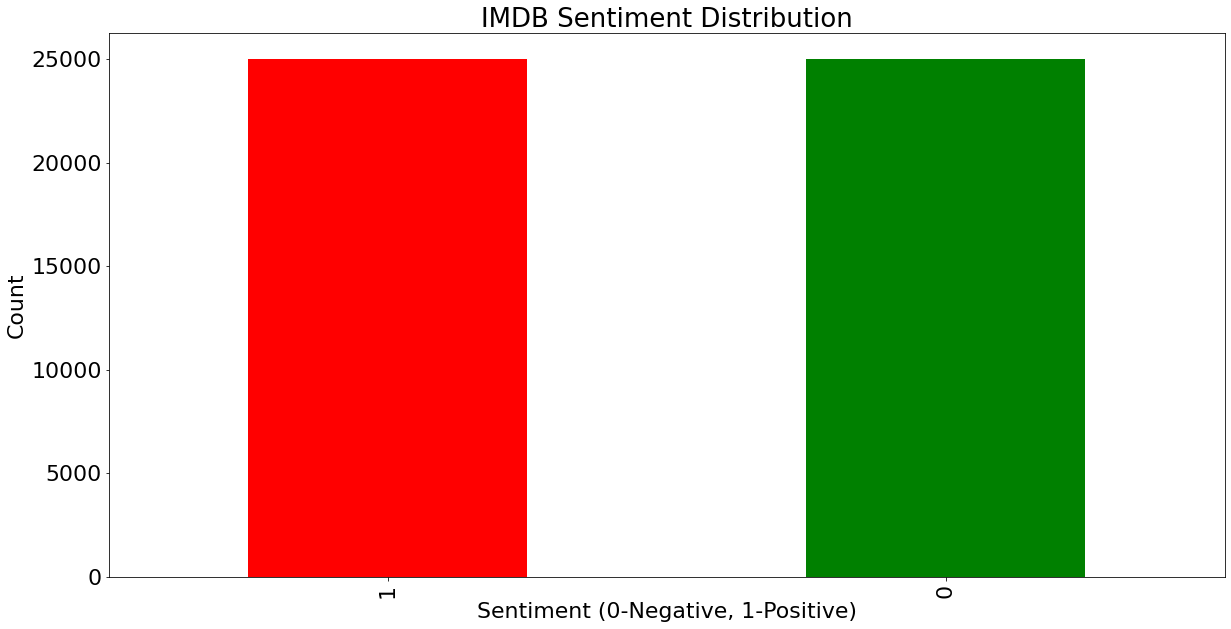

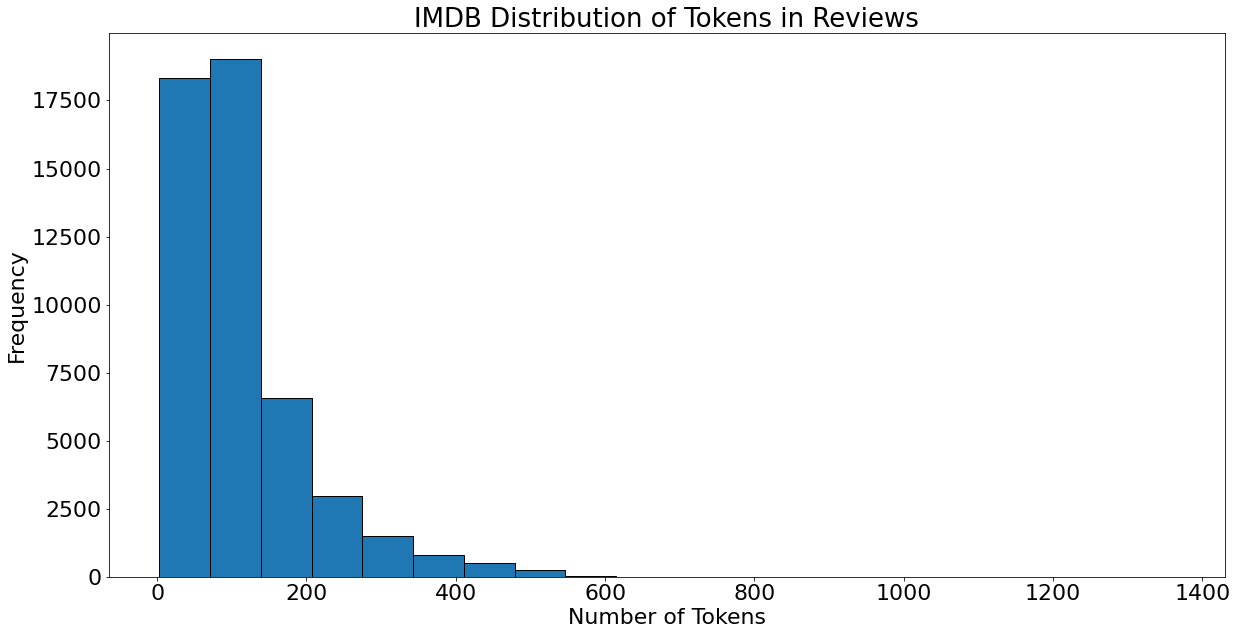

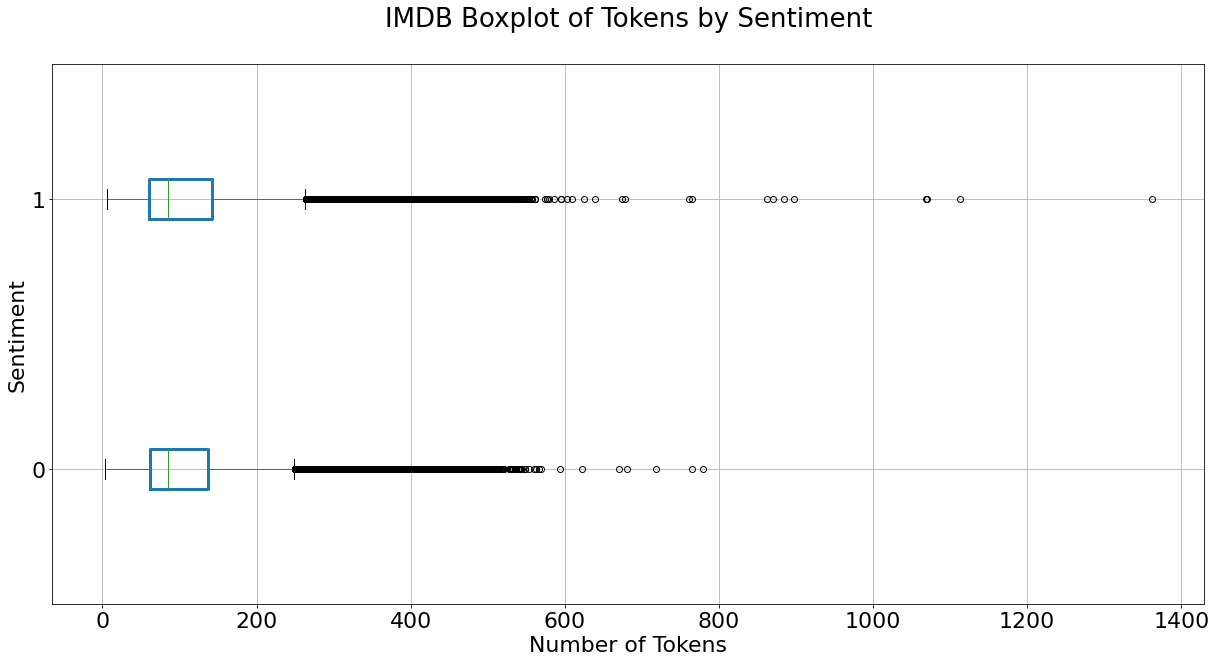

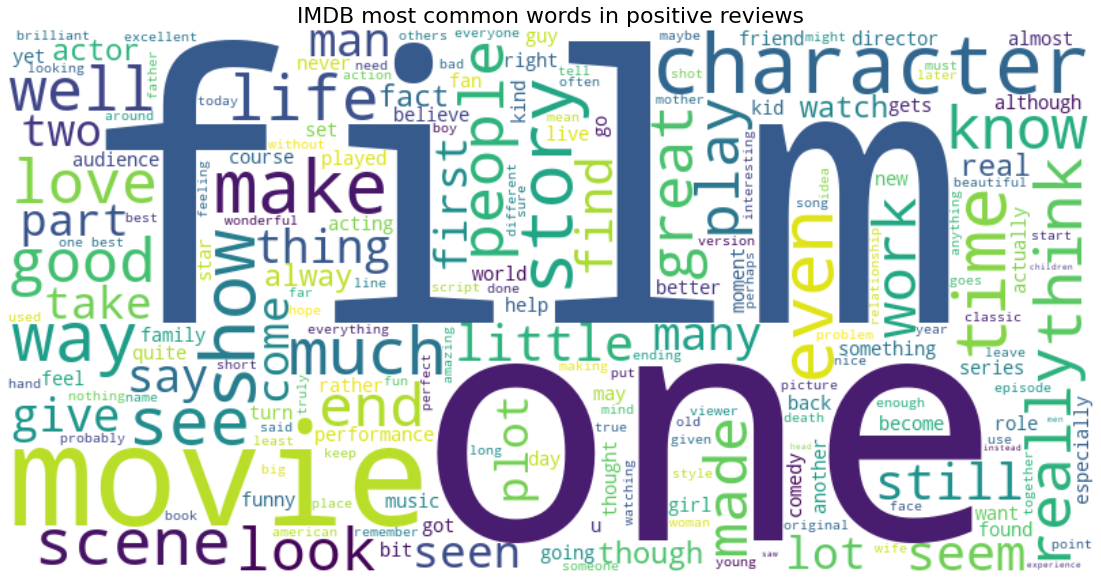

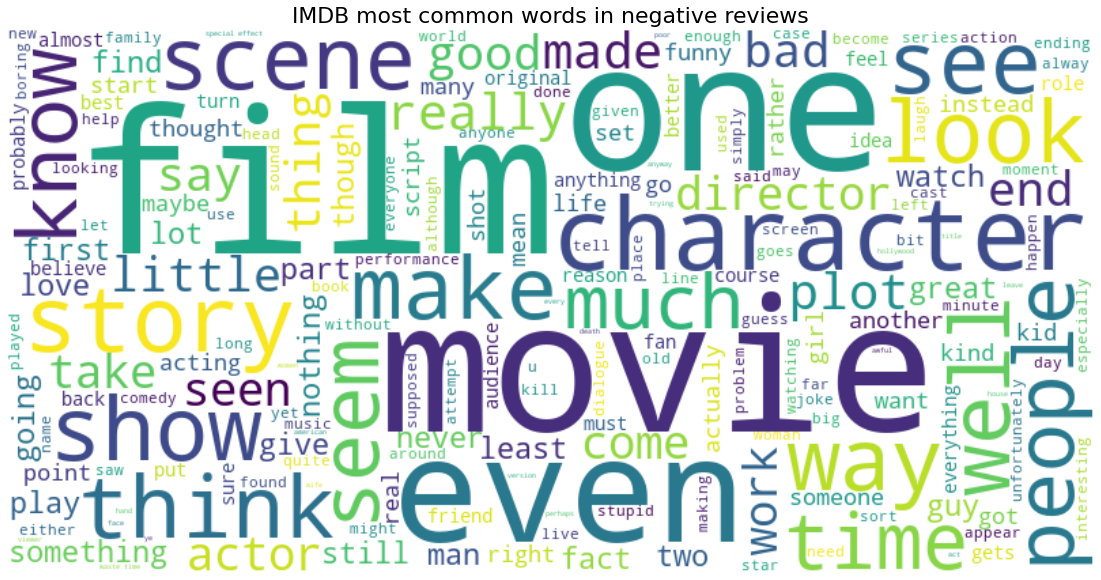

In [2]:
# Call the function with the IMDB CSV file
file_path = "imdb_train_clean.csv"
df = analyze_csv(file_path, "IMDB")